<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/DASK_hyperparameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/the-modern-scientist/hyperparameter-optimization-with-dask-enhancing-machine-learning-efficiency-f2371c55d1ef

Hyperparameter

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning.

https://www.youtube.com/watch?v=cOos6wRMpAU

https://www.youtube.com/watch?v=Bzsxq1JJbbo

In [2]:
pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/162/1
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/162/4
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:41111
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/162/1
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          2
INFO:distributed.worker:               Memory:                  12.67 GiB
INFO:distributed.worker:      Local Directory: /tmp/dask-scratch-space/wo

Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.89625
Test score: 0.885


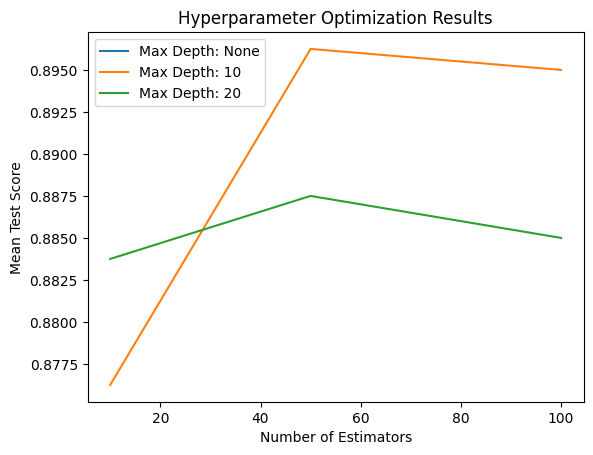

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dask.distributed import Client
from dask_ml.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Start a Dask client
client = Client(processes=False)

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and hyperparameters to test
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}

# Set up GridSearchCV with Dask
grid_search = GridSearchCV(model, param_grid, cv=3)

# Perform hyperparameter optimization
grid_search.fit(X_train_scaled, y_train)

# Best model result
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set
test_score = best_model.score(X_test_scaled, y_test)
print(f"Test score: {test_score}")

# Plotting the results
results = pd.DataFrame(grid_search.cv_results_)
fig, ax = plt.subplots()
for max_depth in results['param_max_depth'].unique():
    subset = results[results['param_max_depth'] == max_depth]
    ax.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'Max Depth: {max_depth}')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Mean Test Score')
ax.set_title('Hyperparameter Optimization Results')
ax.legend()
plt.show()